# Lengths of the associated Bags-of-Words

In [1]:
from functools import partial

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from tqdm import tqdm

from misc_util.pretty_print import Markdown
from derive_conceptualspace.util.mpl_tools import show_hist
from derive_conceptualspace.load_data.load_semanticspaces import load_ppmi_weighted_feature_vectors

plt.rcParams['figure.figsize'] = [16, 8]
largedfstyle = [dict(selector="th", props= [('font-size', '18px')]), dict(selector="td", props= [('font-size', '18px')])]
flatten = lambda l: [item for sublist in l for item in sublist] 

## Places
### Words overall

In [2]:
data_base = "/home/chris/Documents/UNI_neu/Masterarbeit/data_new/semanticspaces/"
vecs = load_ppmi_weighted_feature_vectors(data_base, "places")
counts = pd.DataFrame({k: {"unique words": len(v), "words": sum(v.values())} for k, v in vecs.items()}).T

In [3]:
all_words = set(flatten([set(k.keys()) for k in vecs.values()]))
summed_counts = {i: {"df": 0, "stf": 0} for i in all_words}
for v in tqdm(vecs.values()):
    for word, occs in v.items():
        summed_counts[word]["stf"] += occs
        summed_counts[word]["df"] += 1
words_of_len = {key: {nwords: len({k: v for k, v in summed_counts.items() if v[key] >= nwords}) for nwords in [1, 2, 5, 10, 25, 50, 100, 500, 1000, len(vecs)//10, len(vecs)//4]} for key in ["df", "stf"]}
display(Markdown("### Number of words that have a df or stf of at least..."))
pd.DataFrame(words_of_len).T.style.set_table_styles(largedfstyle)

100%|██████████| 1383/1383 [00:06<00:00, 205.67it/s]


### Number of words that have a df or stf of at least...

,1,2,5,10,25,50,100,500,1000,138,345
df,746180,428810,182906,94010,41320,21833,11166,1452,183,8047,2669
stf,746180,746180,746180,519700,313858,202713,126899,41108,24735,101867,53588


In [4]:
%%capture
fig, ax = show_hist(counts["words"], cutoff_percentile=90, zero_bin=True, ylabel="unique words")

In [5]:
ax.set_ylabel("Number of Entities", fontsize=26)
ax.set_xlabel("Words", fontsize=26)
ax.get_xticklabels()[-1].set_text(ax.get_xticklabels()[-1].get_text().replace("-","-\n"))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=22)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)
ax.grid()
ax.set_title("");

/tmp/ipykernel_218296/204052253.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)


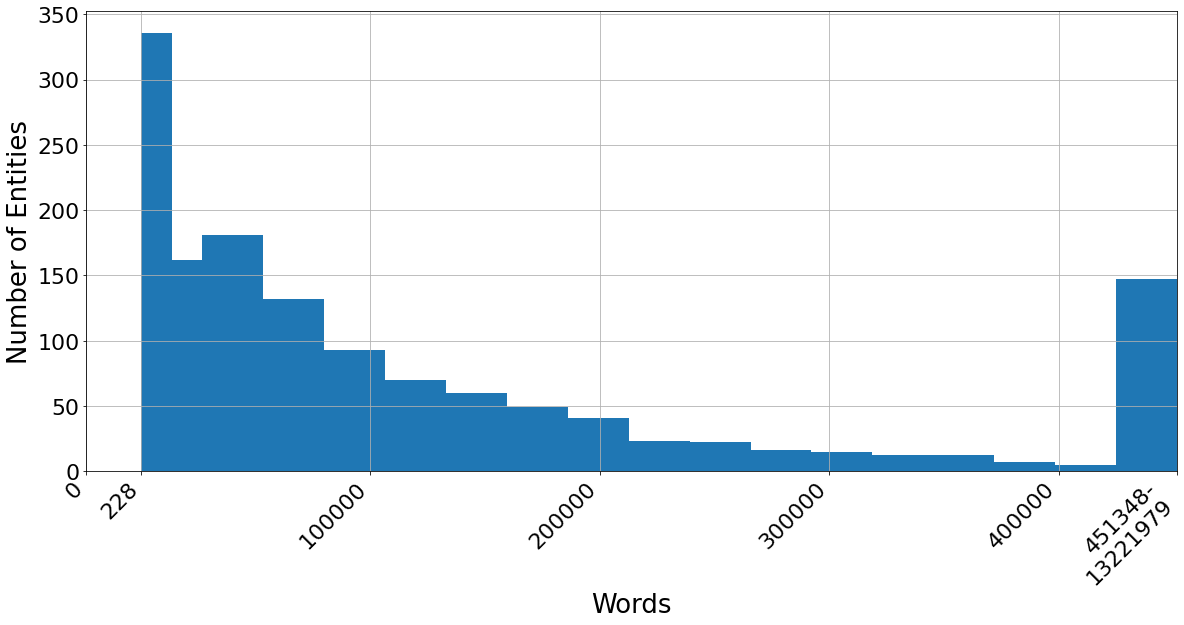

In [6]:
with PdfPages("/home/chris/Documents/UNI_neu/Masterarbeit/MastersThesisText/graphics/figures/placetypes_dist.pdf") as pdf:
    plt.show()
    pdf.savefig(fig, bbox_inches='tight')
    
fig

<br><br> 
### Unique words

In [7]:
%%capture
fig, ax = show_hist(counts["unique words"], cutoff_percentile=92, zero_bin=True, ylabel="unique words")

In [8]:
ax.set_ylabel("Number of Entities", fontsize=26)
ax.set_xlabel("Unique Words", fontsize=26)
ax.get_xticklabels()[-1].set_text(ax.get_xticklabels()[-1].get_text().replace("-","-\n"))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=22)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)
ax.grid()
ax.set_title("");

/tmp/ipykernel_218296/3625053708.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=22)


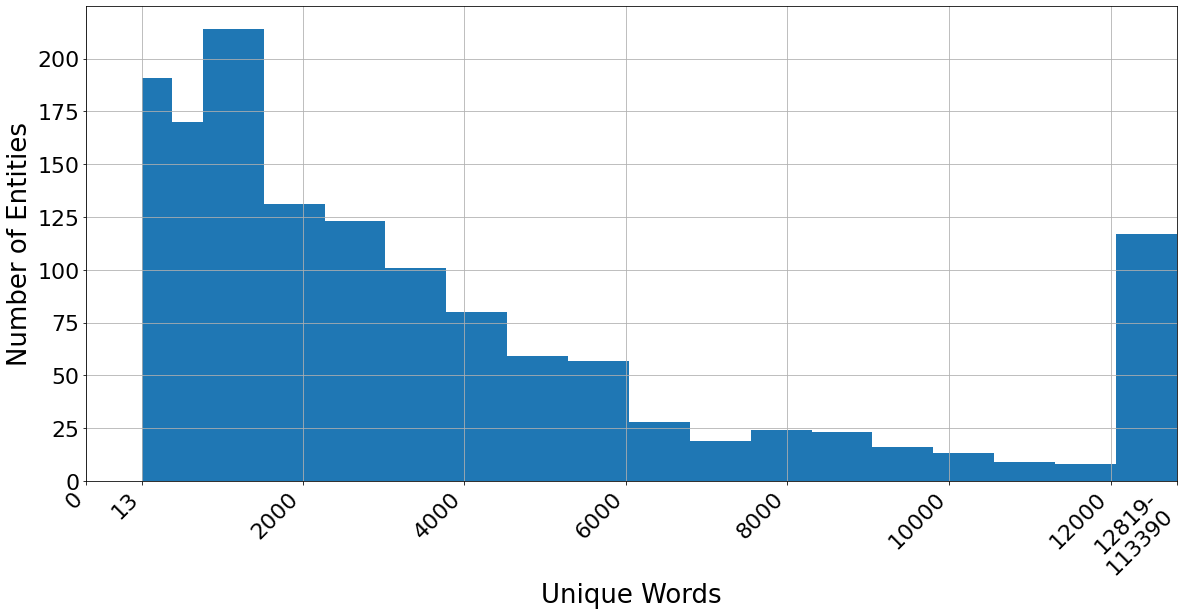

In [9]:
with PdfPages("/home/chris/Documents/UNI_neu/Masterarbeit/MastersThesisText/graphics/figures/placetypes_dist_unique.pdf") as pdf:
    plt.show()
    pdf.savefig(fig, bbox_inches='tight')
    
fig

In [10]:
aggs = counts.agg((min, np.mean, np.median, min), axis="rows")
aggs = pd.concat((aggs, counts.quantile([.05, .95])))
aggs.astype(int).style.set_table_styles(largedfstyle)

,unique words,words
min,13,228
mean,4926,247311
median,2215,55422
min,13,228
0.050000,159,2378
0.950000,18117,886233


<br><br><br><br> 
## Movies

In [11]:
data_base = "/home/chris/Documents/UNI_neu/Masterarbeit/data_new/semanticspaces/"
vecs = load_ppmi_weighted_feature_vectors(data_base, "movies")

In [12]:
all_words = set(flatten([set(k.keys()) for k in vecs.values()]))
summed_counts = {i: {"df": 0, "stf": 0} for i in all_words}
for v in tqdm(vecs.values()):
    for word, occs in v.items():
        summed_counts[word]["stf"] += occs
        summed_counts[word]["df"] += 1
words_of_len = {key: {nwords: len({k: v for k, v in summed_counts.items() if v[key] >= nwords}) for nwords in [1, 2, 5, 10, 25, 50, 100, 500, 1000, len(vecs)//10, len(vecs)//4]} for key in ["df", "stf"]}
display(Markdown("### Number of words that have a df or stf of at least..."))
pd.DataFrame(words_of_len).T.style.set_table_styles(largedfstyle)

100%|██████████| 38649/38649 [00:47<00:00, 821.37it/s] 


### Number of words that have a df or stf of at least...

,1,2,5,10,25,50,100,500,1000,3864,9662
df,589727,279429,128850,86670,55429,39976,28768,11431,6931,1786,332
stf,589727,392885,200470,131801,83354,60952,44809,20314,13558,5317,2484


In [13]:
vecs = {j: vecs[j] for j in [i[0] for i in sorted({k:sum(v.values()) for k, v in vecs.items()}.items(), key=lambda x:x[1], reverse=True)[:15000]]}
# "we selected the 15.000 movies whose associated reviews contained the highest number of words" - when I do it like this it is consistent with the rest of the data
counts = pd.DataFrame({k: {"unique words": len(v), "words": sum(v.values())} for k, v in vecs.items()}).T

In [14]:
aggs = counts.agg((min, np.mean, np.median, min), axis="rows")
aggs = pd.concat((aggs, counts.quantile([.05, .95])))
aggs.astype(int).style.set_table_styles(largedfstyle)

,unique words,words
min,170,851
mean,1990,9225
median,1358,3179
min,170,851
0.050000,565,962
0.950000,5510,38378
